In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df.shape

(891, 12)

In [7]:
df_test.shape

(418, 11)

<h3>Handle Missing Data</h3>

<AxesSubplot:>

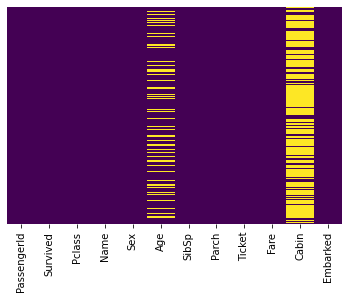

In [8]:
# Training Data
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:>

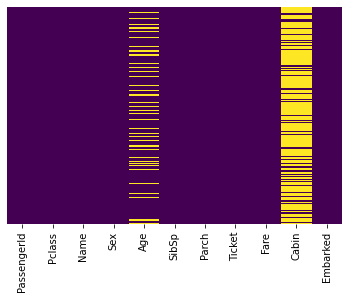

In [9]:
# Test Data
sns.heatmap(df_test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [10]:
# Drop unecessary fields
df.drop(['PassengerId','Name','Ticket','Cabin'], axis='columns', inplace=True)
df_test.drop(['PassengerId','Name','Ticket','Cabin'], axis='columns', inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
# Function to handle all missing data in dataframe
def handle_missing_values(df):
    for column in df:
        if df[column].isnull().sum() > 0:
            if df[column].dtypes == 'object':
                df[column]= df[column].fillna(df[column].mode()[0])
            else:
                df[column]= df[column].fillna(df[column].mean())
    return df            

In [12]:
df = handle_missing_values(df)
df_test = handle_missing_values(df_test)

In [13]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [14]:
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<h3>Handle Categorical Data</h3>

In [15]:
cat_columns = ['Sex', 'Embarked']

In [16]:
# Original One Hot Encoder Function from Krish Naik edited by me

def one_hot_encode(final_df, multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
            
    df_final=pd.concat([final_df,df_final],axis=1)
    df_final = df_final.loc[:,~df_final.columns.duplicated()]
        
    return df_final

In [17]:
final_df = pd.concat([df,df_test], axis='rows')

In [18]:
final_df.shape

(1309, 8)

In [19]:
final_df = one_hot_encode(final_df, cat_columns)

Sex
Embarked


In [20]:
final_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0.0,3,22.0,1,0,7.2500,1,0,1
1,1.0,1,38.0,1,0,71.2833,0,0,0
2,1.0,3,26.0,0,0,7.9250,0,0,1
3,1.0,1,35.0,1,0,53.1000,0,0,1
4,0.0,3,35.0,0,0,8.0500,1,0,1


In [21]:
# Convert columns to int instead of float
final_df['Age'] = final_df['Age'].astype(int)

In [22]:
df_Train = final_df.iloc[:df.shape[0],:]
df_Test = final_df.iloc[df.shape[0]:,:]

In [23]:
df_Test.drop(['Survived'], axis='columns', inplace=True)

/var/folders/7g/47sdtwns2g782ffr3fgfgly80000gn/T/ipykernel_26911/4010551092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Test.drop(['Survived'], axis='columns', inplace=True)


In [24]:
df_Train.shape

(891, 9)

In [25]:
df_Test.shape

(418, 8)

<h3>Modeling</h3>

In [26]:
# Split training x and y data
X_train = df_Train.drop(['Survived'], axis='columns')
y_train = df_Train['Survived'].astype(int)

# Get actual survived data
actual_df = pd.read_csv('gender_submission.csv')
y_test = actual_df['Survived']

In [27]:
# scaled features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(df_Test), columns=df_Test.columns)

<h4>Initial Cross Validation</h4>

- Naive Bayes (77.8%)
- Logistic Regression (79.0%)
- Decision Tree (78.0%)
- K Nearest Neighbor (80.9%) - Scaled
- Random Forest (81.5%)
- Support Vector Classifier (82.8%) - Scaled
- Xtreme Gradient Boosting (81.4%)
- Soft Voting Classifier - All Models (82.6%)

<h5>Audition models</h5>

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [29]:
gnb = GaussianNB()
cv = cross_val_score(gnb, X_train, y_train,cv=5)
print(cv)
print(cv.mean().round(3))

[0.70949721 0.78651685 0.79775281 0.79213483 0.80337079]
0.778


In [30]:
# scaled
gnb = GaussianNB()
cv = cross_val_score(gnb, X_train_scaled, y_train,cv=5)
print(cv)
print(cv.mean().round(3))

[0.70949721 0.78651685 0.79775281 0.79213483 0.80337079]
0.778


In [31]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr, X_train, y_train,cv=5)
print(cv)
print(cv.mean().round(3))

[0.78212291 0.78651685 0.78651685 0.76966292 0.8258427 ]
0.79


In [32]:
# scaled
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr, X_train_scaled, y_train,cv=5)
print(cv)
print(cv.mean().round(3))

[0.77094972 0.78651685 0.78089888 0.76966292 0.82022472]
0.786


In [33]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt, X_train, y_train,cv=5)
print(cv)
print(cv.mean().round(3))

[0.7150838  0.79775281 0.80337079 0.76966292 0.81460674]
0.78


In [34]:
# scaled
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt, X_train_scaled, y_train,cv=5)
print(cv)
print(cv.mean().round(3))

[0.7150838  0.79775281 0.80898876 0.76966292 0.80898876]
0.78


In [35]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn, X_train, y_train,cv=5)
print(cv)
print(cv.mean().round(3))

[0.63128492 0.66853933 0.70786517 0.7247191  0.71910112]
0.69


In [36]:
# scaled
knn = KNeighborsClassifier()
cv = cross_val_score(knn, X_train_scaled, y_train,cv=5)
print(cv)
print(cv.mean().round(3))

[0.79329609 0.78089888 0.8258427  0.8258427  0.82022472]
0.809


In [37]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf, X_train, y_train,cv=5)
print(cv)
print(cv.mean().round(3))

[0.78212291 0.80898876 0.86516854 0.78651685 0.83146067]
0.815


In [38]:
# scaled
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf, X_train_scaled, y_train,cv=5)
print(cv)
print(cv.mean().round(3))

[0.78212291 0.79775281 0.86516854 0.78651685 0.83146067]
0.813


In [39]:
svc = SVC(probability = True)
cv = cross_val_score(svc, X_train, y_train,cv=5)
print(cv)
print(cv.mean().round(3))

[0.58659218 0.71348315 0.69101124 0.68539326 0.69101124]
0.673


In [40]:
# scaled
svc = SVC(probability = True)
cv = cross_val_score(svc, X_train_scaled, y_train,cv=5)
print(cv)
print(cv.mean().round(3))

[0.83240223 0.81460674 0.81460674 0.79775281 0.88202247]
0.828


In [41]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb, X_train, y_train,cv=5)
print(cv)
print(cv.mean().round(3))

[0.76536313 0.82022472 0.85955056 0.78651685 0.83707865]
0.814


In [42]:
# scaled
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb, X_train_scaled, y_train,cv=5)
print(cv)
print(cv.mean().round(3))

[0.77653631 0.82022472 0.85955056 0.78651685 0.83707865]
0.816


In [43]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),
                                            ('knn',knn),
                                            ('rf',rf),
                                            ('gnb',gnb),
                                            ('svc',svc),
                                            ('xgb',xgb)], 
                                            voting = 'soft')

cv = cross_val_score(voting_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.81005587 0.81460674 0.83707865 0.80898876 0.85393258]
0.8249325214989642


<h4>Hypertuning</h4>

In [44]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [45]:
#simple performance reporting function - from Ken Jee
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

<h5>Random Forest</h5>

In [46]:
# Initial parameters

# n_estimators = [int(x) for x in np.linspace(start =10, stop=100, num=10)]
# criterion = ['gini', 'entropy']
# max_depth = [15, 20, 25, None]
# min_samples_split = [2, 5]
# min_samples_leaf =[1, 2]
# max_features = ['sqrt']
# bootstrap = [True, False]

Best Parameters
{'bootstrap': True, 
'criterion': 'entropy', 
'max_depth': 25, 
'max_features': 'sqrt', 
'min_samples_leaf': 2, 
'min_samples_split': 2, 
'n_estimators': 60}

In [47]:
n_estimators = [10]
criterion = ['entropy']
max_depth = [25]
min_samples_split = [4]
min_samples_leaf =[2]
max_features = ['sqrt']
bootstrap = [True]

In [48]:
rf = RandomForestClassifier()

param_grid =  {'n_estimators': n_estimators,
               'criterion': criterion,
               'bootstrap': bootstrap,
               'max_depth': max_depth,
               'max_features': max_features,
               'min_samples_leaf': min_samples_leaf,
               'min_samples_split': min_samples_split}

clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = False, n_jobs = 4)
best_clf_rf = clf_rf.fit(X_train,y_train)
clf_performance(best_clf_rf,'Random Forest')

Random Forest
Best Score: 0.8115058690603225
Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 10}


<h5>Support Vector Classifier</h5>

In [49]:
# Initial parameters

# C = [.1, 1, 10, 100, 1000]
# kernel =['linear', 'poly', 'rbf', 'sigmoid']
# degree = [2,3,4,5]
# gamma = ['scale', 'auto']

Best Parameters {'C': 10, 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf'}

In [50]:
C = [10]
kernel =['rbf']
degree = [3]
gamma = ['auto']

In [51]:
svc = SVC(probability = True)

param_grid =  {'C': C,
               'kernel': kernel,
               'degree': degree,
               'gamma': gamma}

# clf_svc = RandomizedSearchCV(svc, param_distributions = param_grid, cv = 5, verbose = False, n_jobs = 4)
# best_clf_svc = clf_svc.fit(X_train_scaled,y_train)
# clf_performance(best_clf_svc,'Support Vector Classifier')

# GridSearchCV was recommened over RandomizedSearchCV
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = False, n_jobs = 4)
best_clf_svc = clf_svc.fit(X_train_scaled,y_train)
clf_performance(best_clf_svc,'Support Vector Classifier')

Support Vector Classifier
Best Score: 0.8136965664427844
Best Parameters: {'C': 10, 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf'}


<h5>Xtreme Gradient Boosting</h5>

In [52]:
# Initial parameters

# n_estimators = [450,500,550]
# colsample_bytree = [0.75,0.8,0.85]
# max_depth =[None]
# reg_alpha = [1]
# reg_lambda =[2, 5, 10]
# subsample =[0.55, 0.6, .65]
# learning_rate = [0.5]
# gamma = [.5,1,2]
# min_child_weight = [0.01]
# sampling_method = ['uniform']

Best Parameters
{'colsample_bytree': 0.75, 'gamma': 1, 'learning_rate': 0.5, 'max_depth': None, 'min_child_weight': 0.01, 'n_estimators': 550, 'reg_alpha': 1, 'reg_lambda': 5, 'sampling_method': 'uniform', 'subsample': 0.65}

In [53]:
n_estimators = [550]
colsample_bytree = [0.75]
max_depth =[None]
reg_alpha = [1]
reg_lambda =[5]
subsample =[0.65]
learning_rate = [0.5]
gamma = [1]
min_child_weight = [0.01]
sampling_method = ['uniform']

In [54]:
xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': n_estimators,
    'colsample_bytree': colsample_bytree,
    'max_depth': max_depth,
    'reg_alpha': reg_alpha,
    'reg_lambda': reg_lambda,
    'subsample': subsample,
    'learning_rate': learning_rate,
    'gamma': gamma,
    'min_child_weight': min_child_weight,
    'sampling_method': sampling_method
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_train,y_train)
clf_performance(best_clf_xgb,'XGB')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
XGB
Best Score: 0.8428912183792605
Best Parameters: {'colsample_bytree': 0.75, 'gamma': 1, 'learning_rate': 0.5, 'max_depth': None, 'min_child_weight': 0.01, 'n_estimators': 550, 'reg_alpha': 1, 'reg_lambda': 5, 'sampling_method': 'uniform', 'subsample': 0.65}


<h4>Model Results</h4>

In [55]:
y_hat_svc = best_clf_svc.best_estimator_.predict(X_test_scaled).astype(int)

In [56]:
y_hat_rf = best_clf_rf.best_estimator_.predict(X_test_scaled).astype(int)

In [57]:
y_hat_xgb = best_clf_xgb.best_estimator_.predict(df_Test).astype(int)

<h5>Confusion Matrix Plots</h5>

In [58]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[115  37]
 [ 19 247]]


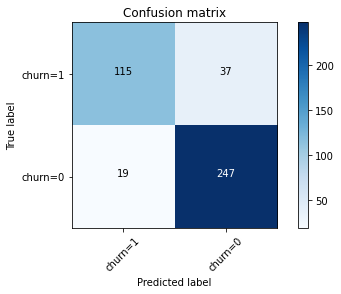

In [59]:
# Support Vector Classifier

cnf_matrix = confusion_matrix(y_test, y_hat_svc, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

Confusion matrix, without normalization
[[148   4]
 [ 83 183]]


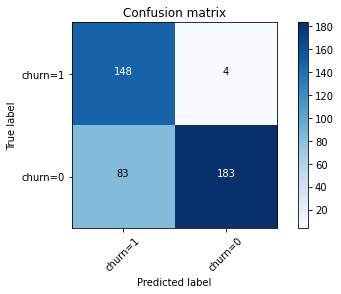

In [60]:
# Random Forest Classifier

cnf_matrix = confusion_matrix(y_test, y_hat_rf, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

Confusion matrix, without normalization
[[107  45]
 [ 26 240]]


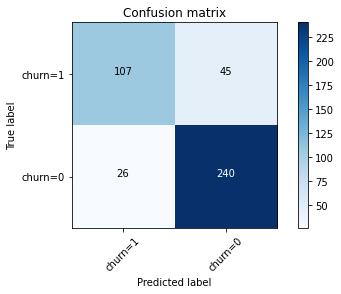

In [61]:
# Xtreme Gradient Boosting

cnf_matrix = confusion_matrix(y_test, y_hat_xgb, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [62]:
print('Support Vector Classifier Score:')
print (classification_report(y_test, y_hat_svc))

Support Vector Classifier Score:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       266
           1       0.86      0.76      0.80       152

    accuracy                           0.87       418
   macro avg       0.86      0.84      0.85       418
weighted avg       0.87      0.87      0.86       418



In [63]:
print('Random Forest Classifier Score:')
print (classification_report(y_test, y_hat_rf))

Random Forest Classifier Score:
              precision    recall  f1-score   support

           0       0.98      0.69      0.81       266
           1       0.64      0.97      0.77       152

    accuracy                           0.79       418
   macro avg       0.81      0.83      0.79       418
weighted avg       0.86      0.79      0.80       418



In [64]:
print('Xtreme Gradient Boosting Score:')
print (classification_report(y_test, y_hat_xgb))

Xtreme Gradient Boosting Score:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       266
           1       0.80      0.70      0.75       152

    accuracy                           0.83       418
   macro avg       0.82      0.80      0.81       418
weighted avg       0.83      0.83      0.83       418



In [65]:

from sklearn.metrics import jaccard_score

print("Jaccard Score for svc: : %.2f" % jaccard_score(y_test, y_hat_svc,pos_label=0))
print("Jaccard Score for rf: : %.2f" % jaccard_score(y_test, y_hat_rf,pos_label=0))
print("Jaccard Score for xbg: : %.2f" % jaccard_score(y_test, y_hat_xgb,pos_label=0))


Jaccard Score for svc: : 0.82
Jaccard Score for rf: : 0.68
Jaccard Score for xbg: : 0.77


<h3>Output Results</h3>

In [66]:
# Select the best predictions and convert to a dataset 
pred_svc = pd.DataFrame(y_hat_svc)
pred_rf = pd.DataFrame(y_hat_rf)
pred_xgb = pd.DataFrame(y_hat_xgb)

# Format data for submission
sub_df = pd.read_csv('gender_submission.csv')

In [67]:
# dataset_svc = pd.concat([sub_df['PassengerId'],pred_svc], axis='columns')
# dataset_svc.columns=['PassengerId','Survived']
# dataset_svc.to_csv('submission_svc.csv', index=False)

In [68]:
# dataset_rf = pd.concat([sub_df['PassengerId'],pred_rf], axis='columns')
# dataset_rf.columns=['PassengerId','Survived']
# dataset_rf.to_csv('submission_rf_2.csv', index=False)

In [69]:
# dataset_xgb = pd.concat([sub_df['PassengerId'],pred_xgb], axis='columns')
# dataset_xgb.columns=['PassengerId','Survived']
# dataset_xgb.to_csv('submission_xgb.csv', index=False)

Xtreme Gradient Boosting had the best prediction after submitting on Kaggle with a 76% accuracy.